In [8]:
import torch

print(f"mps 사용 가능 여부: {torch.backends.mps.is_available()}")
print(f"mps 지원 환경 여부: {torch.backends.mps.is_built()}")

if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

mps 사용 가능 여부: True
mps 지원 환경 여부: True
tensor([1.], device='mps:0')


In [41]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from PIL import Image
import matplotlib.pyplot as plt

첫 번째 이미지: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4032x3024 at 0x33D11E850>
첫 번째 라벨: 1.질병


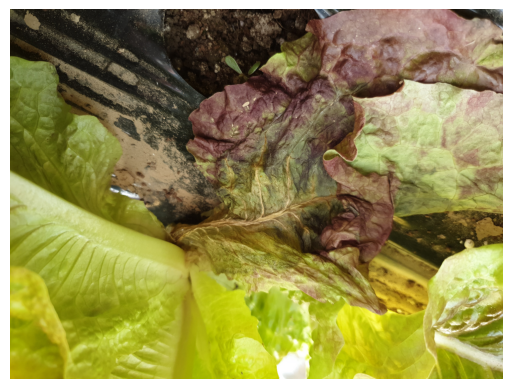

In [50]:
# 데이터셋 클래스 정의
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []

        for label in os.listdir(root_dir):
            label_path = os.path.join(root_dir, label)
            for image_file in os.listdir(label_path):
                self.image_paths.append(os.path.join(label_path, image_file))
                label_name = label.split("_")[1]  # 숫자와 점을 제외한 라벨 추출
                self.labels.append(label_name)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path)
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label
    
# 데이터셋 클래스 인스턴스화
dataset = CustomDataset(root_dir="/Volumes/T7/상추 질병 지단/data/1.Training/원천데이터/05.상추", transform=None)

# 데이터셋의 첫 번째 이미지와 라벨 출력
image, label = dataset[3]
print("첫 번째 이미지:", image)
print("첫 번째 라벨:", label)
# 이미지와 라벨 출력
plt.imshow(image)
plt.axis('off')
plt.show()

첫 번째 이미지: tensor([[[0.1137, 0.0941, 0.1020,  ..., 0.4863, 0.5098, 0.5608],
         [0.0980, 0.1059, 0.1137,  ..., 0.4941, 0.5059, 0.5529],
         [0.0980, 0.0980, 0.1020,  ..., 0.4980, 0.5098, 0.5608],
         ...,
         [0.2353, 0.2314, 0.2000,  ..., 0.4471, 0.4784, 0.5255],
         [0.2431, 0.2157, 0.1647,  ..., 0.4549, 0.4980, 0.5608],
         [0.2471, 0.2000, 0.1451,  ..., 0.4745, 0.5294, 0.6000]],

        [[0.2510, 0.2275, 0.2392,  ..., 0.3373, 0.3647, 0.4118],
         [0.2353, 0.2392, 0.2510,  ..., 0.3451, 0.3608, 0.4078],
         [0.2314, 0.2314, 0.2314,  ..., 0.3529, 0.3647, 0.4157],
         ...,
         [0.1490, 0.1373, 0.1098,  ..., 0.3333, 0.3725, 0.4235],
         [0.1529, 0.1255, 0.0824,  ..., 0.3490, 0.4039, 0.4549],
         [0.1608, 0.1176, 0.0745,  ..., 0.3765, 0.4314, 0.4824]],

        [[0.0667, 0.0471, 0.0667,  ..., 0.2235, 0.2627, 0.3098],
         [0.0549, 0.0627, 0.0824,  ..., 0.2353, 0.2549, 0.3020],
         [0.0588, 0.0588, 0.0745,  ..., 0.2392, 

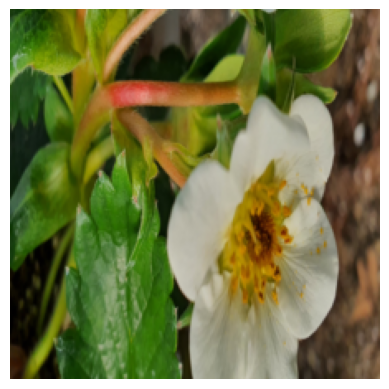

In [59]:
import os
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

# 데이터셋 클래스 정의
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []

        for label in os.listdir(root_dir):
            label_path = os.path.join(root_dir, label)
            if os.path.isdir(label_path):
                for image_file in os.listdir(label_path):
                    image_path = os.path.join(label_path, image_file)
                    if os.path.isfile(image_path):
                        self.image_paths.append(image_path)
                        self.labels.append(label)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# 데이터 변환
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# 데이터셋 인스턴스화
dataset = CustomDataset(root_dir="/Volumes/T7/상추 질병 지단/data/1.Training/원천데이터/05.상추", transform=data_transforms)

# 데이터셋의 첫 번째 이미지와 라벨 출력
image, label = dataset[0]
print("첫 번째 이미지:", image)
print("첫 번째 라벨:", label)

# 이미지와 라벨 출력
plt.imshow(image.permute(1, 2, 0))
plt.axis('off')
plt.show()


In [72]:
# ResNet 모델 불러오기
model = torchvision.models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)  # 클래스 수에 맞게 출력 레이어 변경 (상추의 클래스 개수)

# GPU 사용 가능 여부 확인
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 모델을 GPU로 이동
model = model.to(device)

# 손실 함수 정의
criterion = nn.CrossEntropyLoss()

# 옵티마이저 설정
optimizer = optim.SGD(model.parameters(), lr=0.001)



이미지데이터와 라벨을 분류하기 위한 CustomDataset 클래스

In [7]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset
from torchvision import transforms

class CustomDataset(Dataset):
    def __init__(self, root_dir, mode='Training', transform=None):
        self.root_dir = root_dir
        self.mode = mode
        self.transform = transform

        # 이미지 및 라벨 리스트 초기화
        self.images = []
        self.labels = []

        # 데이터 폴더 경로 설정
        data_folder = 'Training' if mode == 'Training' else 'Validation'
        data_path = os.path.join(root_dir, data_folder)

        # 이미지와 라벨 로드
        self._load_data(data_path)

    #주어진 데이터 폴더에서 이미지와 라벨 로드
    def _load_data(self, data_path): 
        label_folder_path = os.path.join(data_path, "라벨링데이터", "05.상추")
        image_folder_path = os.path.join(data_path, "원천데이터", "05.상추")

        label_folders = os.listdir(label_folder_path)

        for label_folder in label_folders:
            label = int(label_folder.split(".")[0].split()[-1])  # 라벨 추출
            label_path = os.path.join(label_folder_path, label_folder)
            image_path = os.path.join(image_folder_path, label_folder)

            # 이미지 파일과 라벨 파일 매칭
            for image_filename in os.listdir(image_path):
                image_file_path = os.path.join(image_path, image_filename)
                self.images.append(image_file_path)
                self.labels.append(label)

    #데이터 셋의 총 데이터수
    def __len__(self):
        return len(self.images)
    
    #주어진 인덱스에 해당하는 라벨과 이미지 출력 
    def __getitem__(self, idx):
        image_path = self.images[idx]
        label = self.labels[idx]
        
        # 이미지 불러오기
        image = Image.open(image_path).convert('RGB')
        
        # 이미지 전처리 적용
        if self.transform:
            image = self.transform(image)
        
        return image, label

# 데이터셋의 폴더 경로 설정
root_dir = "/Volumes/T7/상추 질병 진단/data"

# 데이터 전처리를 위한 변환 정의
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 데이터셋 인스턴스 생성
train_dataset = CustomDataset(root_dir, mode='Training', transform=transform)
val_dataset = CustomDataset(root_dir, mode='Validation', transform=transform)

# 데이터로더 생성
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

43544
43544
